MACS 30200 

Assginment #3

Delores Tang

## Part 2: Design a visualization

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Preprocess dataset
chicrime = pd.read_csv("ChiCrime.csv")
pd.DataFrame.head(chicrime)
data = chicrime.drop("Case Number", axis = 1)
data = data.drop("Block", axis = 1)
data = data.drop("IUCR", axis = 1)
data = data.drop("Ward", axis = 1)
data = data.drop("Community Area", axis = 1)
data = data.drop("FBI Code", axis = 1)
data = data.drop("X Coordinate", axis = 1)
data = data.drop("Y Coordinate", axis = 1)
data = data.drop("Updated On", axis = 1)
data = data.drop("Latitude", axis = 1)
data = data.drop("Longitude", axis = 1)
data = data.drop("Location", axis = 1)
data = data.drop("Beat", axis = 1)

In [13]:
pd.DataFrame.head(data)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year
0,11694147,05/20/2019 11:59:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,6.0,2019
1,11694159,05/20/2019 11:55:00 PM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENCE,False,False,3.0,2019
2,11694212,05/20/2019 11:55:00 PM,BATTERY,SIMPLE,APARTMENT,False,False,18.0,2019
3,11694165,05/20/2019 11:53:00 PM,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,RESIDENCE,True,False,3.0,2019
4,11694124,05/20/2019 11:50:00 PM,OTHER OFFENSE,GUN OFFENDER: ANNUAL REGISTRATION,STREET,True,False,4.0,2019


In [14]:
year_df = data.groupby('Year')['ID'].nunique()
year_df

Year
2009    392696
2010    370321
2011    351793
2012    335983
2013    307129
2014    275318
2015    264135
2016    269049
2017    268206
2018    266802
2019     91938
Name: ID, dtype: int64

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Georgia"
plt.rcParams['axes.titlepad'] = 20 

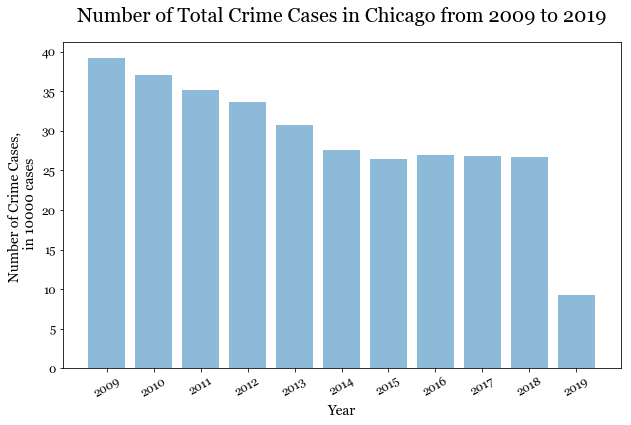

In [16]:
years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
y_pos = np.arange(len(years))

plt.figure(figsize = (10,6))
plt.bar(y_pos, [num/10000 for num in list(year_df)], align='center', alpha=0.5)
plt.xticks(y_pos, years, rotation = 30, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Crime Cases, \n in 10000 cases', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title("Number of Total Crime Cases in Chicago from 2009 to 2019", fontsize =20)
plt.show()

In [60]:
pie_chart_df = {
    "Year"     :      years,
    "Lab list" :      [[] for i in range(len(years))], 
    "Val list" :      [[] for i in range(len(years))]
}
for i in range(len(years)):
    year = years[i]
    year_df = data.loc[data['Year'] == int(year)]
    type_df = year_df.groupby('Primary Type')['ID'].nunique()
    type_df = type_df.sort_values(ascending = False)
    lab = list(type_df.index[0:9])
    lab.append("Others")
    pie_chart_df["Lab list"][i] = lab
    val = list(type_df[0:9])
    val.append(sum(type_df[10:]))
    pie_chart_df["Val list"][i] = val

Text(0.5, 1.7, 'Year 2019')

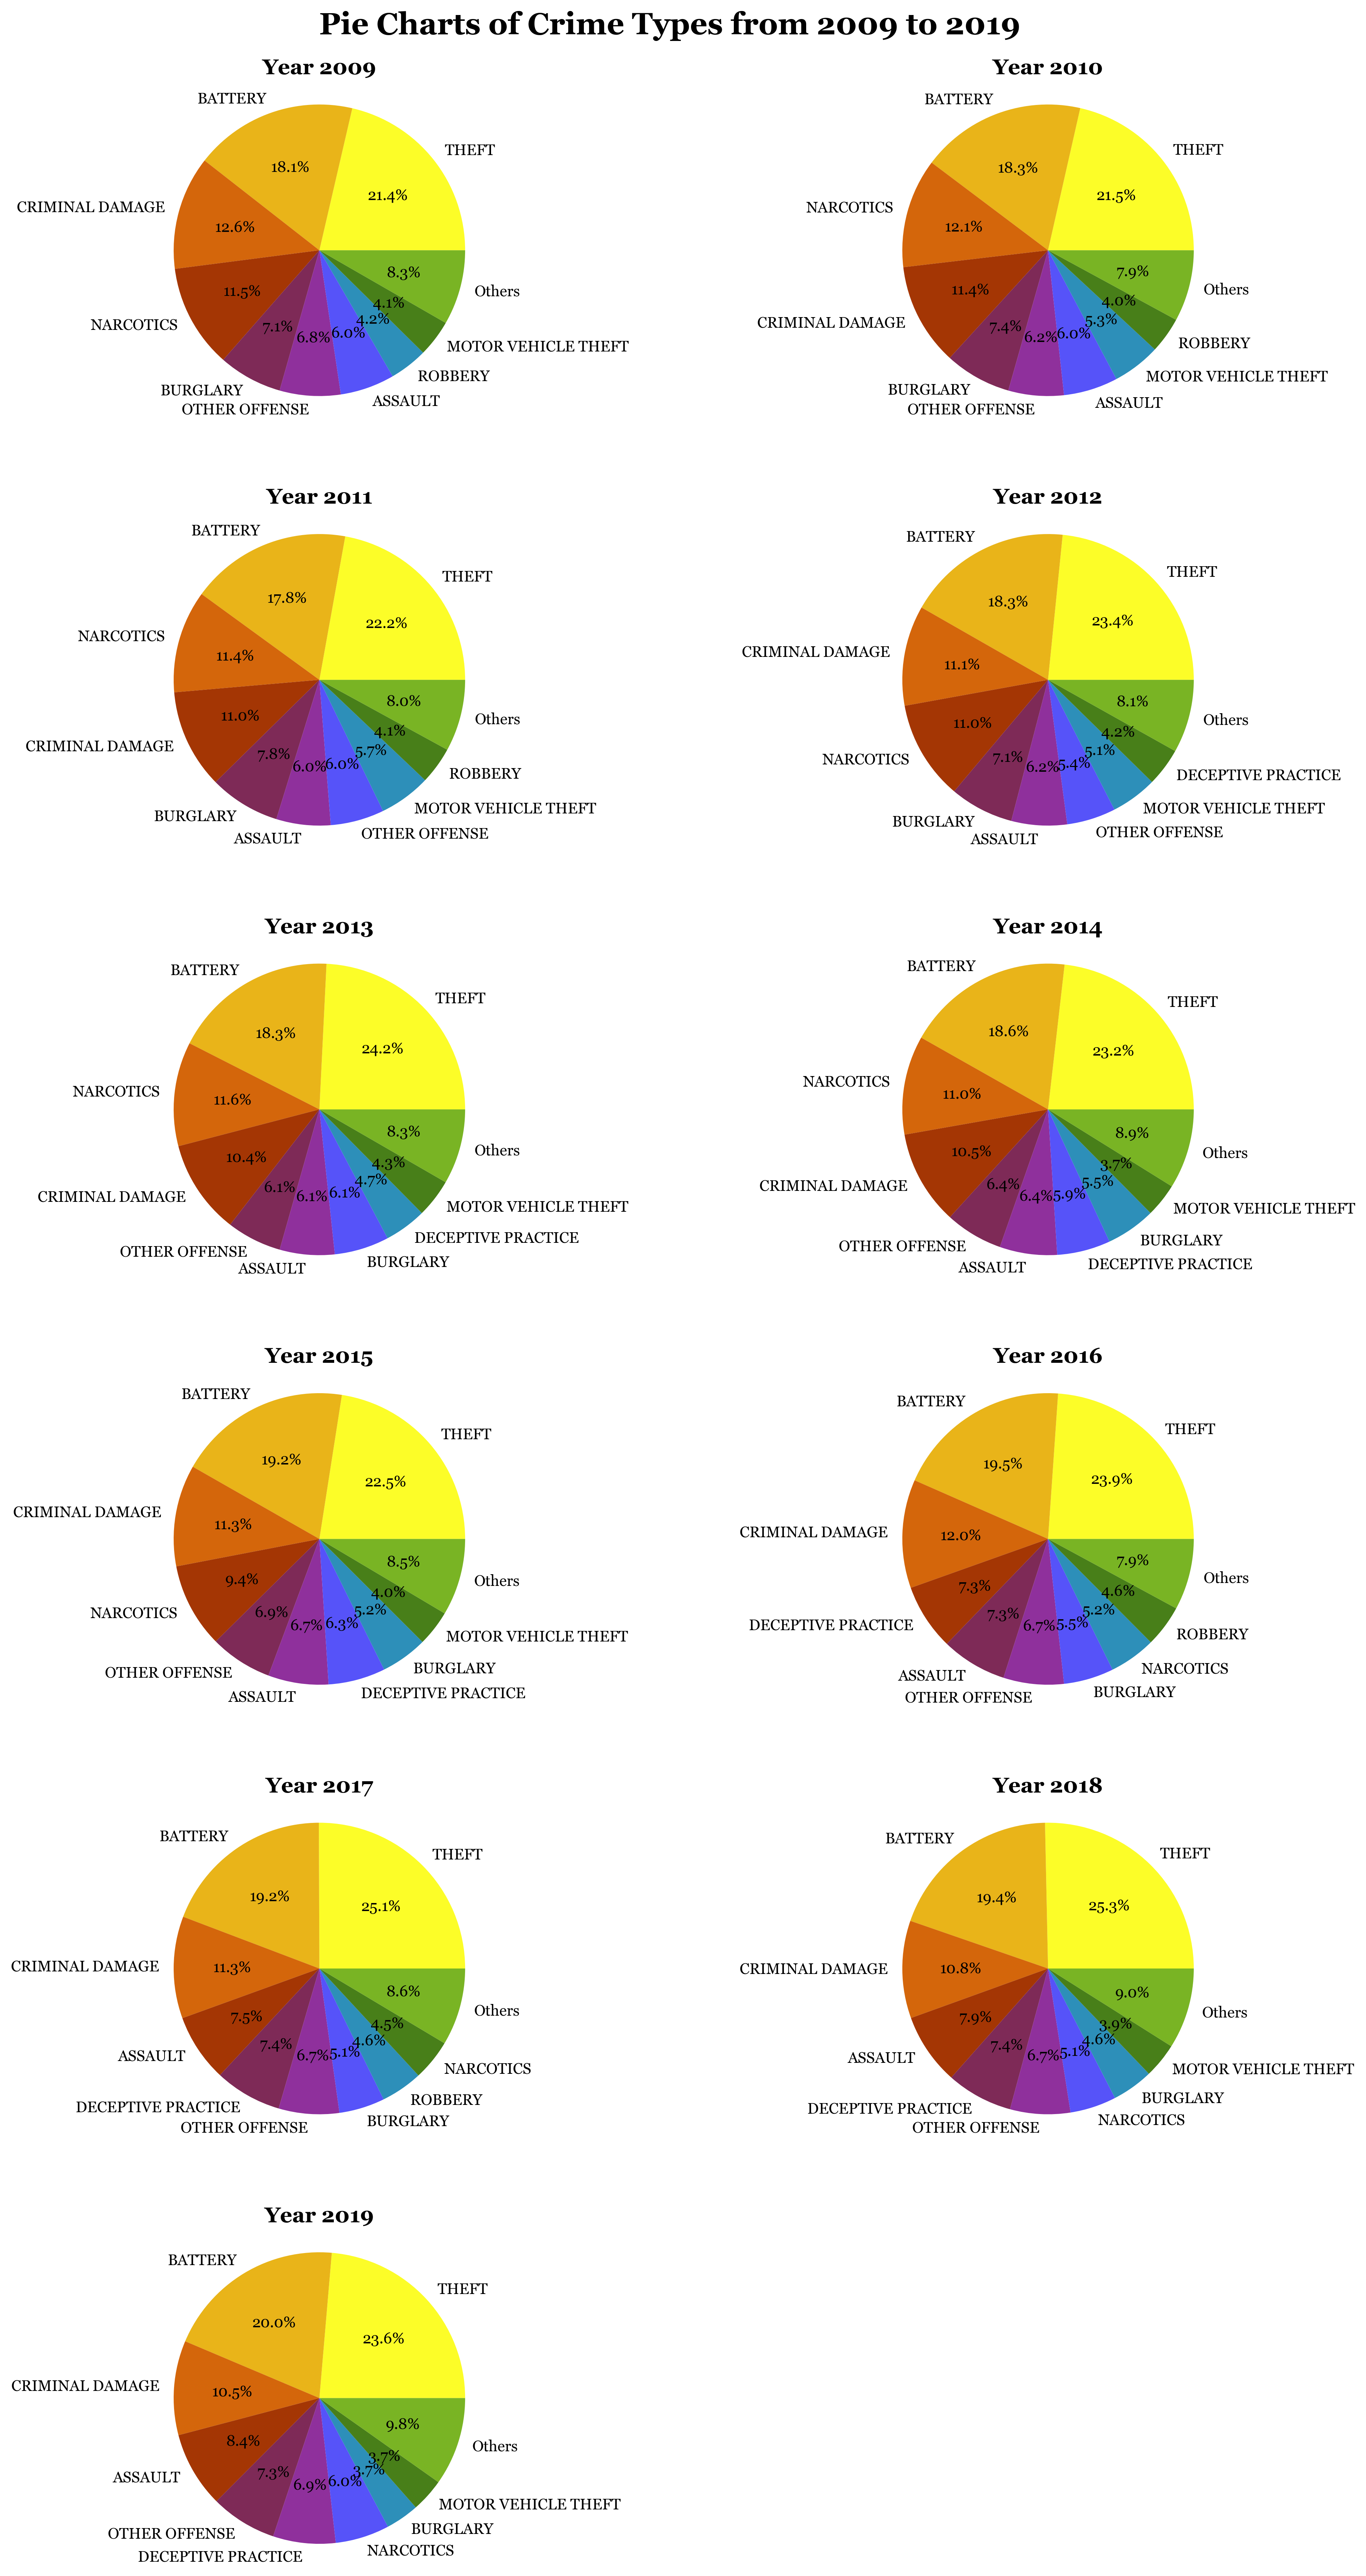

In [128]:
colors = ['#fcfd28', '#e9b419', '#d4660b', '#a43604', '#7e2a57',
          '#8f309c', '#5653f9', '#2d8fb9', '#487f19', '#79b424']

fig = plt.figure(figsize=(10, 28), dpi=300)
plt.subplots_adjust(hspace = 1.5, wspace = 5)
fig.suptitle("Pie Charts of Crime Types from 2009 to 2019", fontsize = 20, y = 0.93, fontweight='bold')

ax1 = plt.subplot2grid((6,2),(0,0))
plt.pie(pie_chart_df["Val list"][0], labels = pie_chart_df["Lab list"][0], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2009', fontsize = 14, fontweight='bold', y = 1.7)

ax2 = plt.subplot2grid((6,2),(0,1))
plt.pie(pie_chart_df["Val list"][1], labels = pie_chart_df["Lab list"][1], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2010', fontsize = 14, fontweight='bold', y = 1.7)

ax3 = plt.subplot2grid((6,2),(1,0))
plt.pie(pie_chart_df["Val list"][2], labels = pie_chart_df["Lab list"][2], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2011', fontsize = 14, fontweight='bold', y = 1.7)

ax4 = plt.subplot2grid((6,2),(1,1))
plt.pie(pie_chart_df["Val list"][3], labels = pie_chart_df["Lab list"][3], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2012', fontsize = 14, fontweight='bold', y = 1.7)

ax5 = plt.subplot2grid((6,2),(2,0))
plt.pie(pie_chart_df["Val list"][4], labels = pie_chart_df["Lab list"][4], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2013', fontsize = 14, fontweight='bold', y = 1.7)

ax6 = plt.subplot2grid((6,2),(2,1))
plt.pie(pie_chart_df["Val list"][5], labels = pie_chart_df["Lab list"][5], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2014', fontsize = 14, fontweight='bold', y = 1.7)

ax7 = plt.subplot2grid((6,2),(3,0))
plt.pie(pie_chart_df["Val list"][6], labels = pie_chart_df["Lab list"][6], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2015', fontsize = 14, fontweight='bold', y = 1.7)

ax8 = plt.subplot2grid((6,2),(3,1))
plt.pie(pie_chart_df["Val list"][7], labels = pie_chart_df["Lab list"][7], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2016', fontsize = 14, fontweight='bold', y = 1.7)

ax9 = plt.subplot2grid((6,2),(4,0))
plt.pie(pie_chart_df["Val list"][8], labels = pie_chart_df["Lab list"][8], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2017', fontsize = 14, fontweight='bold', y = 1.7)

ax10 = plt.subplot2grid((6,2),(4,1))
plt.pie(pie_chart_df["Val list"][9], labels = pie_chart_df["Lab list"][9], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2018', fontsize = 14, fontweight='bold', y = 1.7)

ax11 = plt.subplot2grid((6,2),(5,0))
plt.pie(pie_chart_df["Val list"][10], labels = pie_chart_df["Lab list"][10], 
        autopct='%1.1f%%', colors = colors, radius = 3)
plt.title('Year 2019', fontsize = 14, fontweight='bold', y = 1.7)

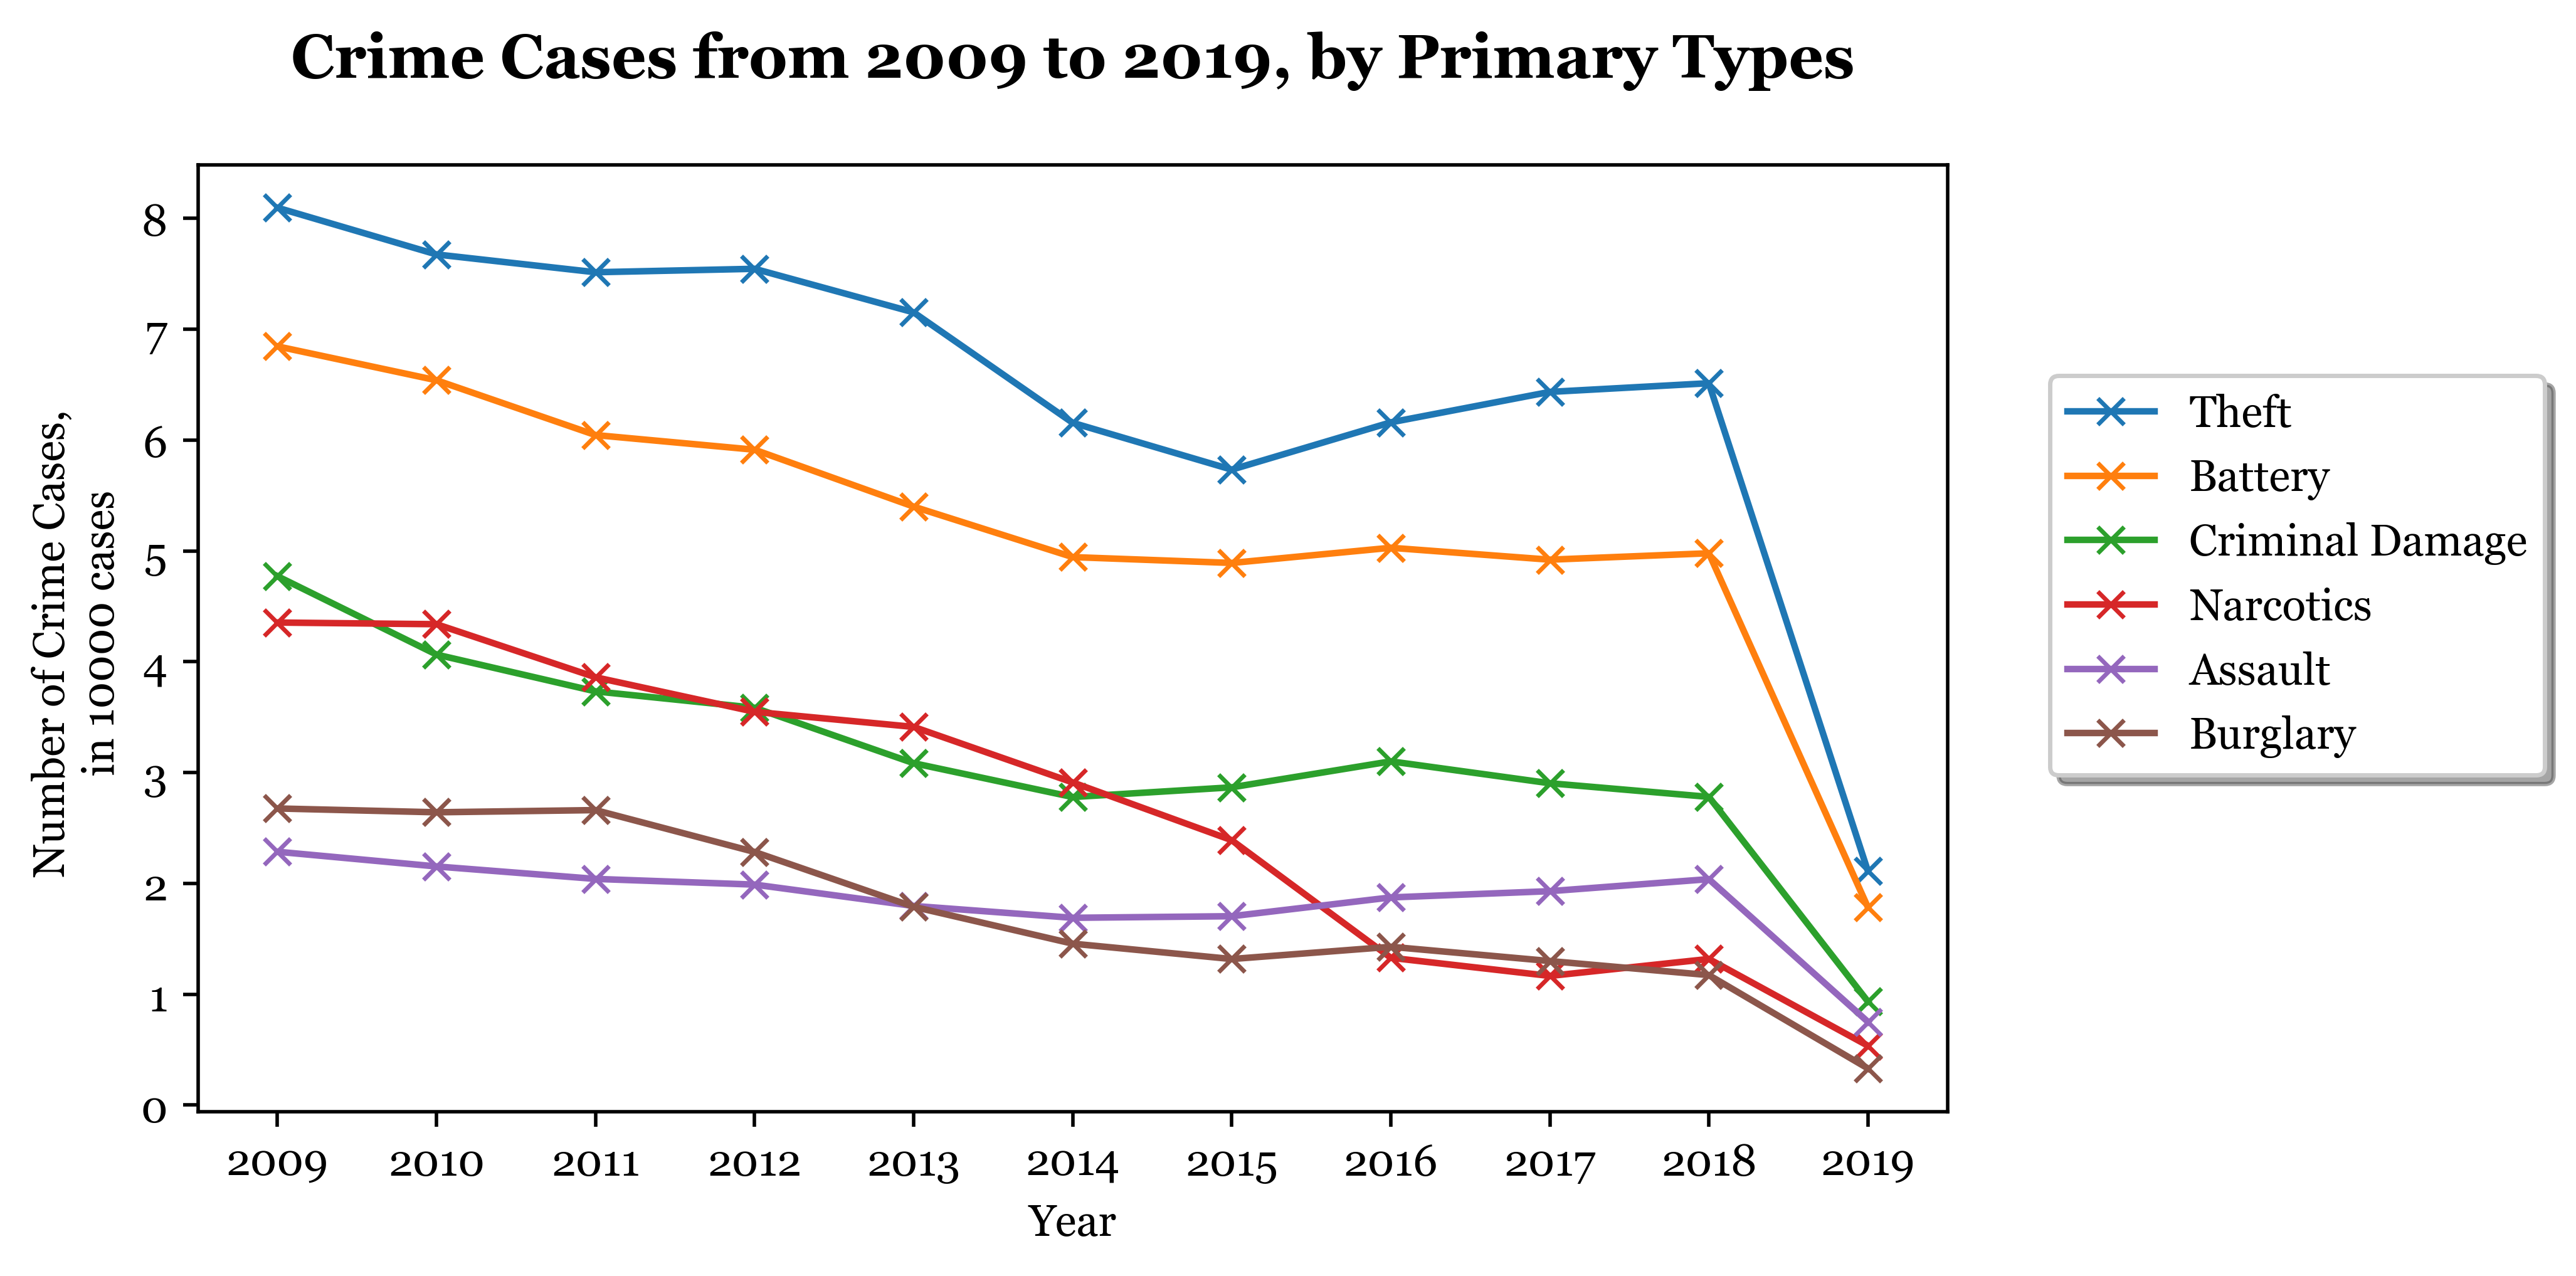

In [181]:
type_df = data.groupby('Primary Type')['ID'].nunique()
type_df = type_df.sort_values(ascending = False)
type_df[0:4]
crime_lst = ["Theft", "Battery", "Criminal Damage", "Narcotics", "Assault", "Burglary"]

fig = plt.figure(dpi = 500)
ax = plt.subplot(111)
for crime in crime_lst:
    crime_df = data.loc[data['Primary Type'] == crime.upper()]
    case_by_year = crime_df.groupby('Year')['ID'].nunique()
    num_crime = case_by_year
    ax.plot(years, [num/10000 for num in num_crime], marker = 'x')

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.2, chartBox.height])
ax.legend(crime_lst, loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
plt.title("Crime Cases from 2009 to 2019, by Primary Types", fontsize = 14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Crime Cases, \n in 10000 cases")
plt.show()

#### Discussion

    The data are drawn from the Chicago Data Portal website (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2). I downloaded the data for crime cases that happened in Chicago area from 2009 to 2019, and then preprocessed the CSV data file in Python, dropping unwanted columns from the dataset. The visualization of the data is consisted of three parts. The first bar graph represents the overall number of crime cases over the 10 year period. The second set of pie charts give more detailed information regarding specific type of crimes in each year, as well as the percentages of their occurrences. In the third line chart, I included 6 crimes that had most prevalence in total and plotted their corresponding crime case numbers across the years. 
    
    The story that I was aiming to tell is that the number of crimes decreased from 2009 to approximately 2014, but remained at a steady level afterwards. Despite the general pattern, the most prevalent crimes remained similar over the years, with Theft and Battery to be the top two crimes. Among other most prevalent crimes, Narcotics has exhibited a dramatic decrease from 2013 to 2016. In a word, the goal for the visualization is to give the audience a better sense regarding how criminal incidences had been changed in number and in types over the 11 year period. 
    
    For the first plot, I selected the bar graph as it is the most intuitive representation for number of cases across different conditions. Bar graph provides a way to easily compare overall numbers for different groups. In this case, bar graph enables my audience to see how the total numbers of crime incidences change over this period. Because the objective for the first graph is simple, and the only information I want it to convey is the 10-year-change in crime numbers, the bar graph's size or color is not very informative. However, I aimed to make this a graph with clarity and spontaneous insights. I hope that this simplistic design could highlight the most important information without distracting my audience. 
    
    The second set of pie charts are more complex. I specifically chose this design in order to make my overall visualization more functional. Considering that my audience might be interested in the proportion of a specific type of crime in a given year, pie chart would provide the most clear comparison between the percentages of different crimes in all data points. In this case, colors of slides are used to distinguish these different types of crimes, and percentages are computed to give an accurate numerical representations of crime types for each year. 
    
    For the third line plot, I used colors, similar to the previous plot, in order to distinguish different types of crimes. I did not choose a bar graph design as the first plot, because now my goal is to represent more complex data in one graph. Bar graph does not allow me to show my audience how one trend of a crime's occurrences is differed from the trend of another crime. In the case of Narcotics, for example, my audience could easily notice its abnormal decreasing pattern on a line chart. 
    
    I think that my decisions facilitated communication efficiency in several ways. First, I used different types of graphs to convey information with different levels of details. Pie charts and line graphs are designed for most specific information, and bar graph is only for a summary of the big picture. Thus, the whole visualization still has knowledge-building insights, in which the audience could start thinking about the data from a more general aspect and then gradually comes down to more specific detials. However, I also think that some improvements could be made to promote the truthfulness of the visualization. First, 2019's data are, in fact, impossible to compare with other years' data. One possibility to solve this problem is to impute data to the 2019 crime cases. However, this would be far more complicated and computationally expensive because the real dataset actually involves a lot more other variables, such as geographical location, time of the day, and season. Therefore, in the future for a better analysis, I would consider imputing the whole 2019's data and then create visualization accordingly. Second, neither the pie chart or the line chart could include the whole set of crime types. In that case, I think that an interactive graph that allows users to zoom in and out to include more details may be a better option. However, a package that may allow me to do that could not be successfully installed to my computer due to version conflicts. 